In [3]:
#Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [40]:
#import Census data and crime data

census_df = pd.read_csv("califpop_df.csv")
crime_df = pd.read_csv("county_crime_df.csv")
cali_boundaries_df = pd.read_csv("us-county-boundaries - California.csv")

In [41]:
coordinates_df = cali_boundaries_df[['NAMELSAD','INTPTLAT','INTPTLON']]
crime_df = crime_df.merge(coordinates_df,how="left",left_on="County",right_on="NAMELSAD")
crime_df = crime_df.drop(columns=["NAMELSAD","Unnamed: 0"]).rename(columns={"INTPTLAT": "Latitude", "INTPTLON": "Longitude"})

crime_df

,County,2016,2017,2018,2019,2020,Latitude,Longitude
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442
5,Colusa County,403.0,421.0,426.0,410.0,396.0,39.177738,-122.237563
6,Contra Costa County,33033.0,33797.0,31644.0,32901.0,27854.0,37.919479,-121.951543
7,Del Norte County,783.0,862.0,741.0,931.0,862.0,41.763958,-124.003614
8,El Dorado County,3439.0,3233.0,3353.0,2886.0,2945.0,38.785612,-120.534224
9,Fresno County,38239.0,36623.0,33648.0,28206.0,31052.0,36.761006,-119.655019


In [25]:
#remove commas from population data and convert string to float
census_df[['2016 Population','2017 Population',
           '2018 Population','2019 Population','2020 Population']] = census_df[['2016 Population','2017 Population','2018 Population','2019 Population','2020 Population']] .replace(',', '', regex=True).astype(float)

KeyError: "['2016 Population'] not in index"

In [17]:
#Determine crime per capita for each year
crime_df['2016 Crime per Capita (%)'] = crime_df['2016']/census_df['2016 Population']*100
crime_df['2017 Crime per Capita (%)'] = crime_df['2017']/census_df['2017 Population']*100
crime_df['2018 Crime per Capita (%)'] = crime_df['2018']/census_df['2018 Population']*100
crime_df['2019 Crime per Capita (%)'] = crime_df['2019']/census_df['2019 Population']*100
crime_df['2020 Crime per Capita (%)'] = crime_df['2020']/census_df['2020 Population']*100

crime_df

,Unnamed: 0,County,2017,2018,2019,2020,2021,2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2021 Crime per Capita (%)
0,0,Alameda County,74223.0,69248.0,76846.0,68433.0,72143.0,4.471739,4.155056,4.605937,4.116709,4.376133
1,1,Alpine County,45.0,41.0,45.0,33.0,42.0,4.032258,3.792784,4.043127,2.949062,3.400810
2,2,Amador County,769.0,721.0,795.0,745.0,858.0,1.994864,1.832321,2.002872,1.858643,2.079546
3,3,Butte County,8375.0,7120.0,6421.0,5546.0,5975.0,3.662003,3.091217,2.935636,2.606889,2.868335
4,4,Calaveras County,998.0,1057.0,983.0,924.0,862.0,2.185816,2.310534,2.131443,1.995336,1.864953
5,5,Colusa County,421.0,426.0,410.0,396.0,374.0,1.952871,1.991678,1.909286,1.836905,1.706438
6,6,Contra Costa County,33797.0,31644.0,32901.0,27854.0,26804.0,2.950098,2.749644,2.853802,2.417183,2.307878
7,7,Del Norte County,862.0,741.0,931.0,862.0,819.0,3.147939,2.666139,3.336559,3.082094,2.914591
8,8,El Dorado County,3233.0,3353.0,2886.0,2945.0,2872.0,1.712458,1.756187,1.494895,1.526500,1.486381
9,9,Fresno County,36623.0,33648.0,28206.0,31052.0,32696.0,3.719106,3.394338,2.826686,3.102352,3.225791


In [18]:
#print dataframe into csv file
crime_df.to_csv('crime_per_capita_df.csv')

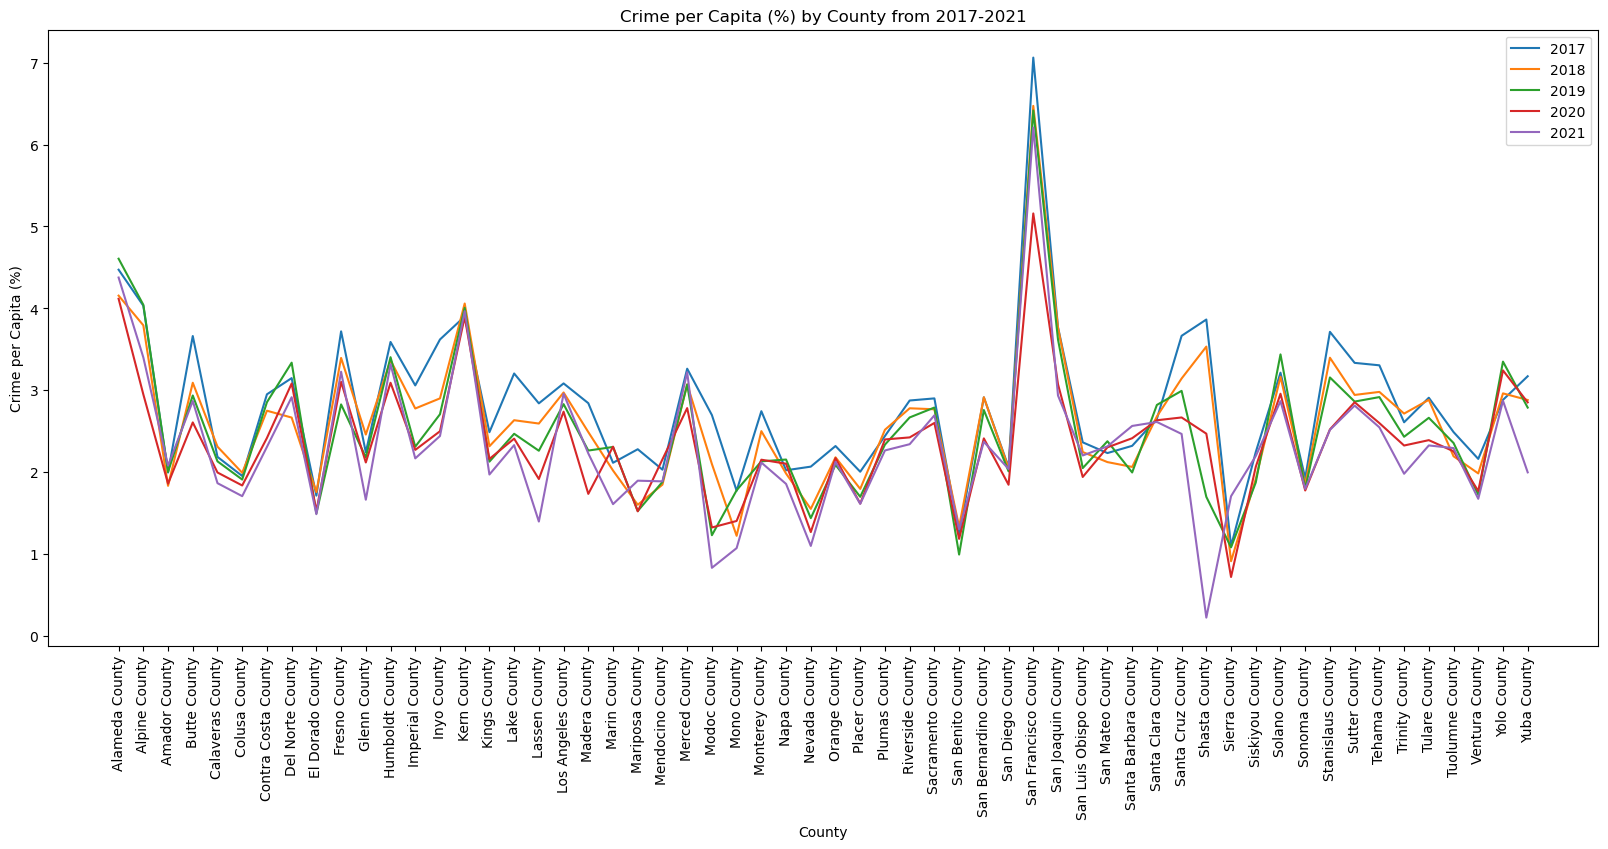

In [48]:
#create line graph based on crime per capita by county
crime_df.plot(kind="line",x='County',
              y=['2016 Crime per Capita (%)','2017 Crime per Capita (%)','2018 Crime per Capita (%)','2019 Crime per Capita (%)','2020 Crime per Capita (%)'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("Crime per Capita (%) by County from 2016-2020")
plt.ylabel("Crime per Capita (%)")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("Crime per Capita (%) by County from 2016-2020")

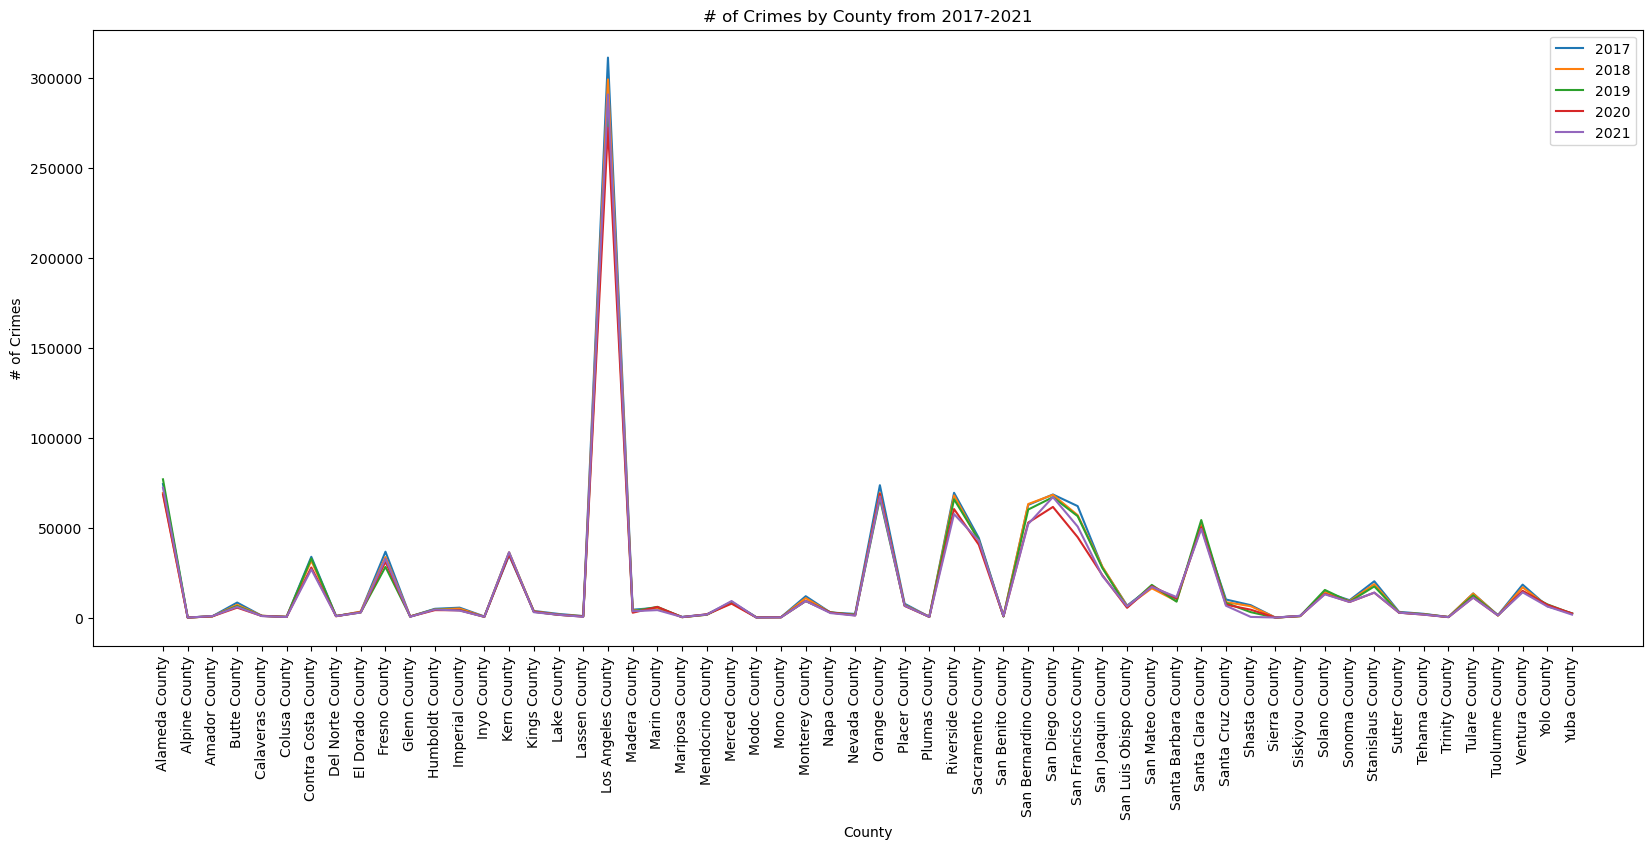

In [49]:
#create line graph based on # of crime by county
crime_df.plot(kind="line",x='County',
              y=['2016','2017','2018','2019','2020'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("# of Crimes by County from 2016-2020")
plt.ylabel("# of Crimes")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("# of Crimes by County from 2017-2020.png")

In [51]:
cali_boundaries_df =pd.read_csv("us-county-boundaries - California.csv")
cali_boundaries_df.head()

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
0,"35.3428473738, -118.729900424","{""coordinates"":[[[-119.913659,35.439262],[-119...",6,29,2054176,6029,Kern,Kern County,CA,6,...,NaN,12540.0,NaN,A,21062540828,78680980,35.346629,-118.729506,California,29
1,"36.0753604529, -119.815502709","{""coordinates"":[[[-119.958925,36.255468],[-119...",6,31,277280,6031,Kings,Kings County,CA,6,...,260.0,25260.0,NaN,A,3600883803,3162664,36.072478,-119.815530,California,31
2,"36.6057058971, -121.074995529","{""coordinates"":[[[-121.483002,36.76505],[-121....",6,69,277299,6069,San Benito,San Benito County,CA,6,...,488.0,41940.0,NaN,A,3596591082,4719300,36.611651,-121.085811,California,69
3,"36.7581801263, -119.649322632","{""coordinates"":[[[-120.422187,36.840139],[-120...",6,19,277274,6019,Fresno,Fresno County,CA,6,...,260.0,23420.0,NaN,A,15432139300,136609898,36.761006,-119.655019,California,19
4,"40.0046824769, -120.838597596","{""coordinates"":[[[-121.367008,40.077673],[-121...",6,63,277296,6063,Plumas,Plumas County,CA,6,...,NaN,NaN,NaN,A,6612400910,156387636,39.992295,-120.824371,California,63
